In [57]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/happiness-index-2018-2019/report_2018-2019.csv
/kaggle/input/happiness-index-2018-2019/2019.csv
/kaggle/input/happiness-index-2018-2019/2018.csv


In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
source_data_path = '/kaggle/input/happiness-index-2018-2019/report_2018-2019.csv'
print(source_data_path)

/kaggle/input/happiness-index-2018-2019/report_2018-2019.csv


In [60]:
my_data = pd.read_csv(source_data_path, sep = ',')

In [61]:
my_data.shape

(312, 10)

In [62]:
my_data.columns

Index(['Overall rank', 'Country or region', 'Year', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [63]:
my_data.describe()

,Overall rank,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000
mean,78.500000,2018.500000,5.391506,0.898298,1.211026,0.661295,0.423538,0.182926,0.111526
std,45.104737,0.500803,1.114631,0.394592,0.300310,0.252724,0.156024,0.096739,0.095296
min,1.000000,2018.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,2018.000000,4.514250,0.609500,1.055750,0.488250,0.322500,0.108750,0.050000
50%,78.500000,2018.500000,5.379500,0.960000,1.265500,0.699000,0.449500,0.175500,0.082000
75%,117.250000,2019.000000,6.176000,1.219500,1.457500,0.858000,0.540250,0.245000,0.141250
max,156.000000,2019.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.598000,0.457000


In [64]:
my_data.describe(include = 'object')

,Country or region
count,312
unique,160
top,Afghanistan
freq,2


In [65]:
my_data.Year.value_counts()

2019    156
2018    156
Name: Year, dtype: int64

In [79]:
print(my_data.head(5))
print(my_data.tail(5))
my_data

   Overall rank Country or region  Year  Score  GDP per capita  \
0           154       Afghanistan  2019  3.203           0.350   
1           145       Afghanistan  2018  3.632           0.332   
2           107           Albania  2019  4.719           0.947   
3           112           Albania  2018  4.586           0.916   
4            88           Algeria  2019  5.211           1.002   

   Social support  Healthy life expectancy  Freedom to make life choices  \
0           0.517                    0.361                         0.000   
1           0.537                    0.255                         0.085   
2           0.848                    0.874                         0.383   
3           0.817                    0.790                         0.419   
4           1.160                    0.785                         0.086   

   Generosity  Perceptions of corruption  
0       0.158                      0.025  
1       0.191                      0.036  
2       0.178    

,Overall rank,Country or region,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,154,Afghanistan,2019,3.203,0.350,0.517,0.361,0.000,0.158,0.025
1,145,Afghanistan,2018,3.632,0.332,0.537,0.255,0.085,0.191,0.036
2,107,Albania,2019,4.719,0.947,0.848,0.874,0.383,0.178,0.027
3,112,Albania,2018,4.586,0.916,0.817,0.790,0.419,0.149,0.032
4,88,Algeria,2019,5.211,1.002,1.160,0.785,0.086,0.073,0.114
...,...,...,...,...,...,...,...,...,...,...
307,152,Yemen,2018,3.355,0.442,1.073,0.343,0.244,0.083,0.064
308,138,Zambia,2019,4.107,0.578,1.058,0.426,0.431,0.247,0.087
309,125,Zambia,2018,4.377,0.562,1.047,0.295,0.503,0.221,0.082
310,146,Zimbabwe,2019,3.663,0.366,1.114,0.433,0.361,0.151,0.089


In [80]:
my_data.nunique()

Overall rank                    156
Country or region               160
Year                              2
Score                           295
GDP per capita                  276
Social support                  266
Healthy life expectancy         242
Freedom to make life choices    236
Generosity                      198
Perceptions of corruption       174
dtype: int64

In [81]:
print(my_data.count())
print('----------')
print('Riike kokku: ',my_data['Country or region'].count()/2)
print('Unikaalseid riigi väärtusi kokku:', my_data['Country or region'].nunique())
print('Unikaalseid aastaarve kokku:', my_data['Year'].nunique())

Overall rank                    312
Country or region               312
Year                            312
Score                           312
GDP per capita                  312
Social support                  312
Healthy life expectancy         312
Freedom to make life choices    312
Generosity                      312
Perceptions of corruption       312
dtype: int64
----------
Riike kokku:  156.0
Unikaalseid riigi väärtusi kokku: 160
Unikaalseid aastaarve kokku: 2


In [82]:
my_data.count()
my_data['Country or region'].count()
my_data['Country or region'].nunique()
my_data['Year'].nunique()

2

In [83]:
my_data.isnull().sum()

Overall rank                    0
Country or region               0
Year                            0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [84]:
my_data.isnull()

,Overall rank,Country or region,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
307,False,False,False,False,False,False,False,False,False,False
308,False,False,False,False,False,False,False,False,False,False
309,False,False,False,False,False,False,False,False,False,False
310,False,False,False,False,False,False,False,False,False,False


In [85]:
print(my_data[my_data.duplicated(['Year','Country or region'],keep=False)])

Empty DataFrame
Columns: [Overall rank, Country or region, Year, Score, GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption]
Index: []


In [86]:
new_row = pd.DataFrame({'Year': [2018], 'Country or region': ['Bulgaria'], 'Overall rank': [100], 'Score': [4.933], 'GDP per capita': [1.054], 'Social support' : [1.515], 'Healthy life expectancy' : [0.712], 'Freedom to make life choices' : [0.359], 'Generosity' : [0.064], 'Perceptions of corruption' : [0.009]})
data = pd.concat([my_data,new_row],ignore_index = True)
data

,Overall rank,Country or region,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,154,Afghanistan,2019,3.203,0.350,0.517,0.361,0.000,0.158,0.025
1,145,Afghanistan,2018,3.632,0.332,0.537,0.255,0.085,0.191,0.036
2,107,Albania,2019,4.719,0.947,0.848,0.874,0.383,0.178,0.027
3,112,Albania,2018,4.586,0.916,0.817,0.790,0.419,0.149,0.032
4,88,Algeria,2019,5.211,1.002,1.160,0.785,0.086,0.073,0.114
...,...,...,...,...,...,...,...,...,...,...
308,138,Zambia,2019,4.107,0.578,1.058,0.426,0.431,0.247,0.087
309,125,Zambia,2018,4.377,0.562,1.047,0.295,0.503,0.221,0.082
310,146,Zimbabwe,2019,3.663,0.366,1.114,0.433,0.361,0.151,0.089
311,144,Zimbabwe,2018,3.692,0.357,1.094,0.248,0.406,0.132,0.099


In [88]:
print(my_data[my_data.duplicated(['Year','Country or region'],keep=False)])
print(my_data[my_data.duplicated(['Year','Country or region'],keep='first')])
print(my_data[my_data.duplicated(['Year','Country or region'],keep='last')])

Empty DataFrame
Columns: [Overall rank, Country or region, Year, Score, GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption]
Index: []
Empty DataFrame
Columns: [Overall rank, Country or region, Year, Score, GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption]
Index: []
Empty DataFrame
Columns: [Overall rank, Country or region, Year, Score, GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption]
Index: []


In [91]:
my_data = my_data.drop_duplicates(['Year','Country or region'],keep='first')

In [93]:
print(my_data[my_data.duplicated(['Year','Country or region'],keep=False)])
print(my_data.count())
print('----------')
print('Riike kokku: ',my_data['Country or region'].count())
print('Unikaalseid riigi väärtusi kokku:', my_data['Country or region'].nunique())
print('Unikaalseid aastaarve kokku:', my_data['Year'].nunique())

Empty DataFrame
Columns: [Overall rank, Country or region, Year, Score, GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption]
Index: []
Overall rank                    312
Country or region               312
Year                            312
Score                           312
GDP per capita                  312
Social support                  312
Healthy life expectancy         312
Freedom to make life choices    312
Generosity                      312
Perceptions of corruption       312
dtype: int64
----------
Riike kokku:  312
Unikaalseid riigi väärtusi kokku: 160
Unikaalseid aastaarve kokku: 2


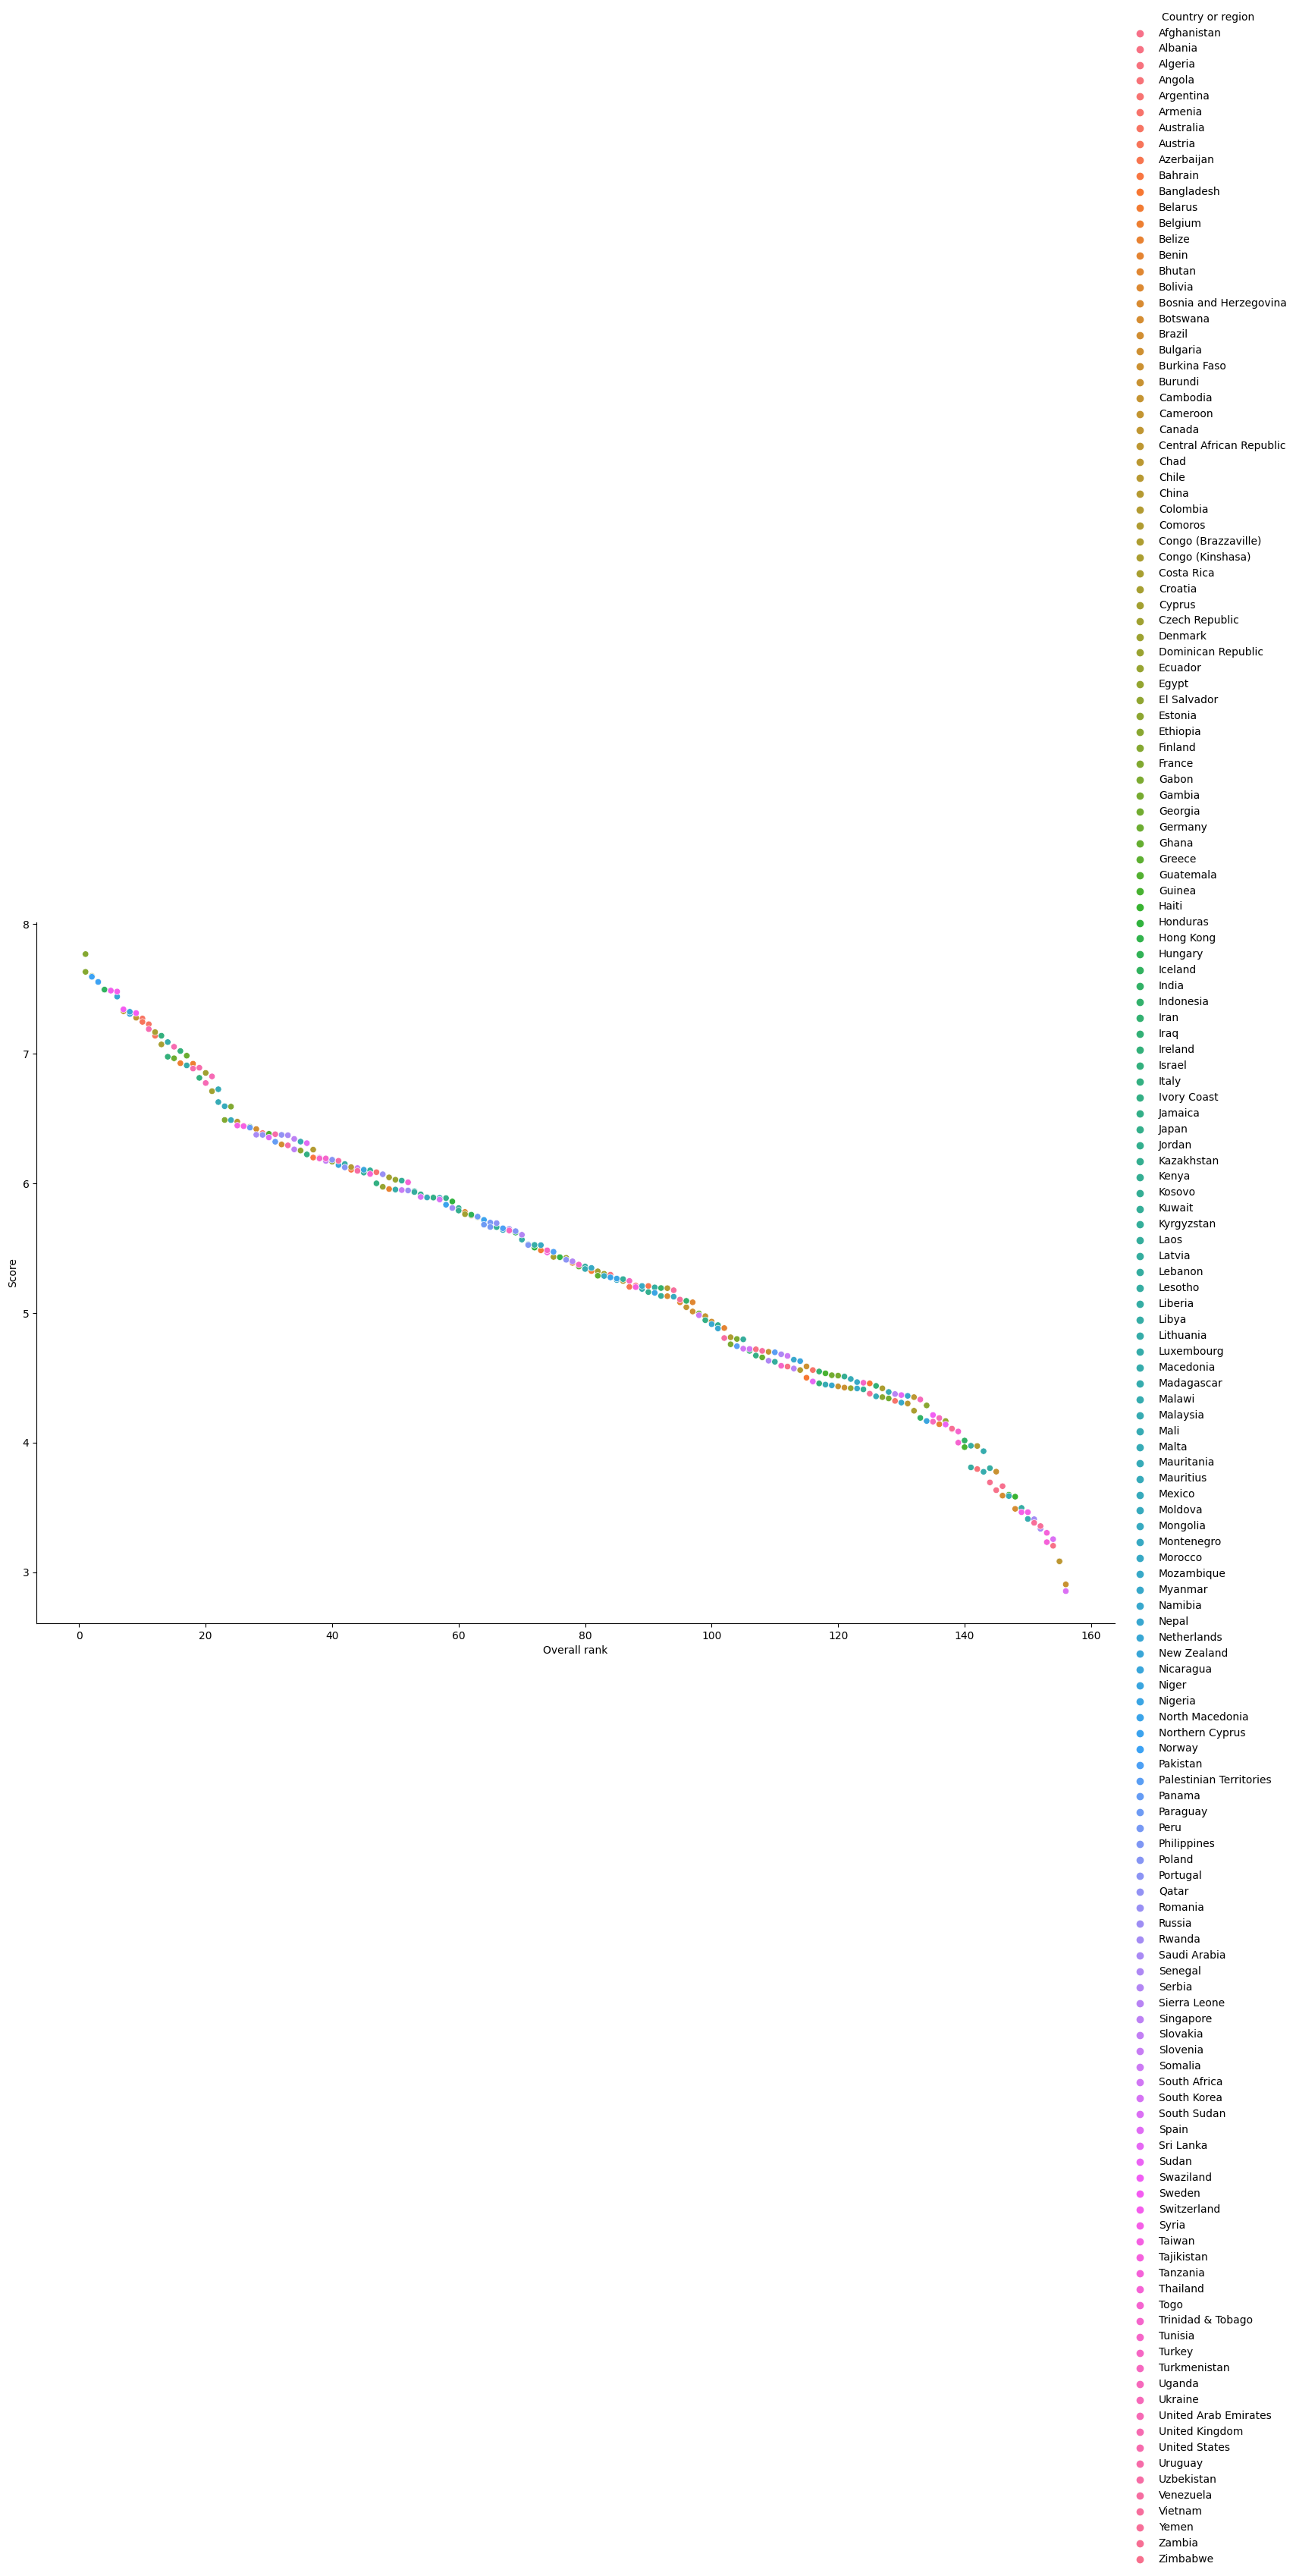

In [94]:
import seaborn as sns
sns.relplot(x = 'Overall rank', y = 'Score', hue = 'Country or region', data = my_data, height = 10, aspect = 1.5)

In [96]:
my_data.sort_values(by = ['Score'], ascending = False)

,Overall rank,Country or region,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
87,1,Finland,2019,7.769,1.340,1.587,0.986,0.596,0.153,0.393
88,1,Finland,2018,7.632,1.305,1.592,0.874,0.681,0.202,0.393
73,2,Denmark,2019,7.600,1.383,1.573,0.996,0.592,0.252,0.410
211,2,Norway,2018,7.594,1.456,1.582,0.861,0.686,0.286,0.340
74,3,Denmark,2018,7.555,1.351,1.590,0.868,0.683,0.284,0.408
...,...,...,...,...,...,...,...,...,...,...
0,154,Afghanistan,2019,3.203,0.350,0.517,0.361,0.000,0.158,0.025
50,155,Central African Republic,2019,3.083,0.026,0.000,0.105,0.225,0.235,0.035
51,155,Central African Republic,2018,3.083,0.024,0.000,0.010,0.305,0.218,0.038
43,156,Burundi,2018,2.905,0.091,0.627,0.145,0.065,0.149,0.076


In [97]:
my_pivot_all = pd.pivot_table(my_data, values='Score', 
                                index='Country or region')
print(my_pivot_all)

                    Score
Country or region        
Afghanistan        3.4175
Albania            4.6525
Algeria            5.2530
Angola             3.7950
Argentina          6.2370
...                   ...
Venezuela          4.7565
Vietnam            5.1390
Yemen              3.3675
Zambia             4.2420
Zimbabwe           3.6775

[160 rows x 1 columns]


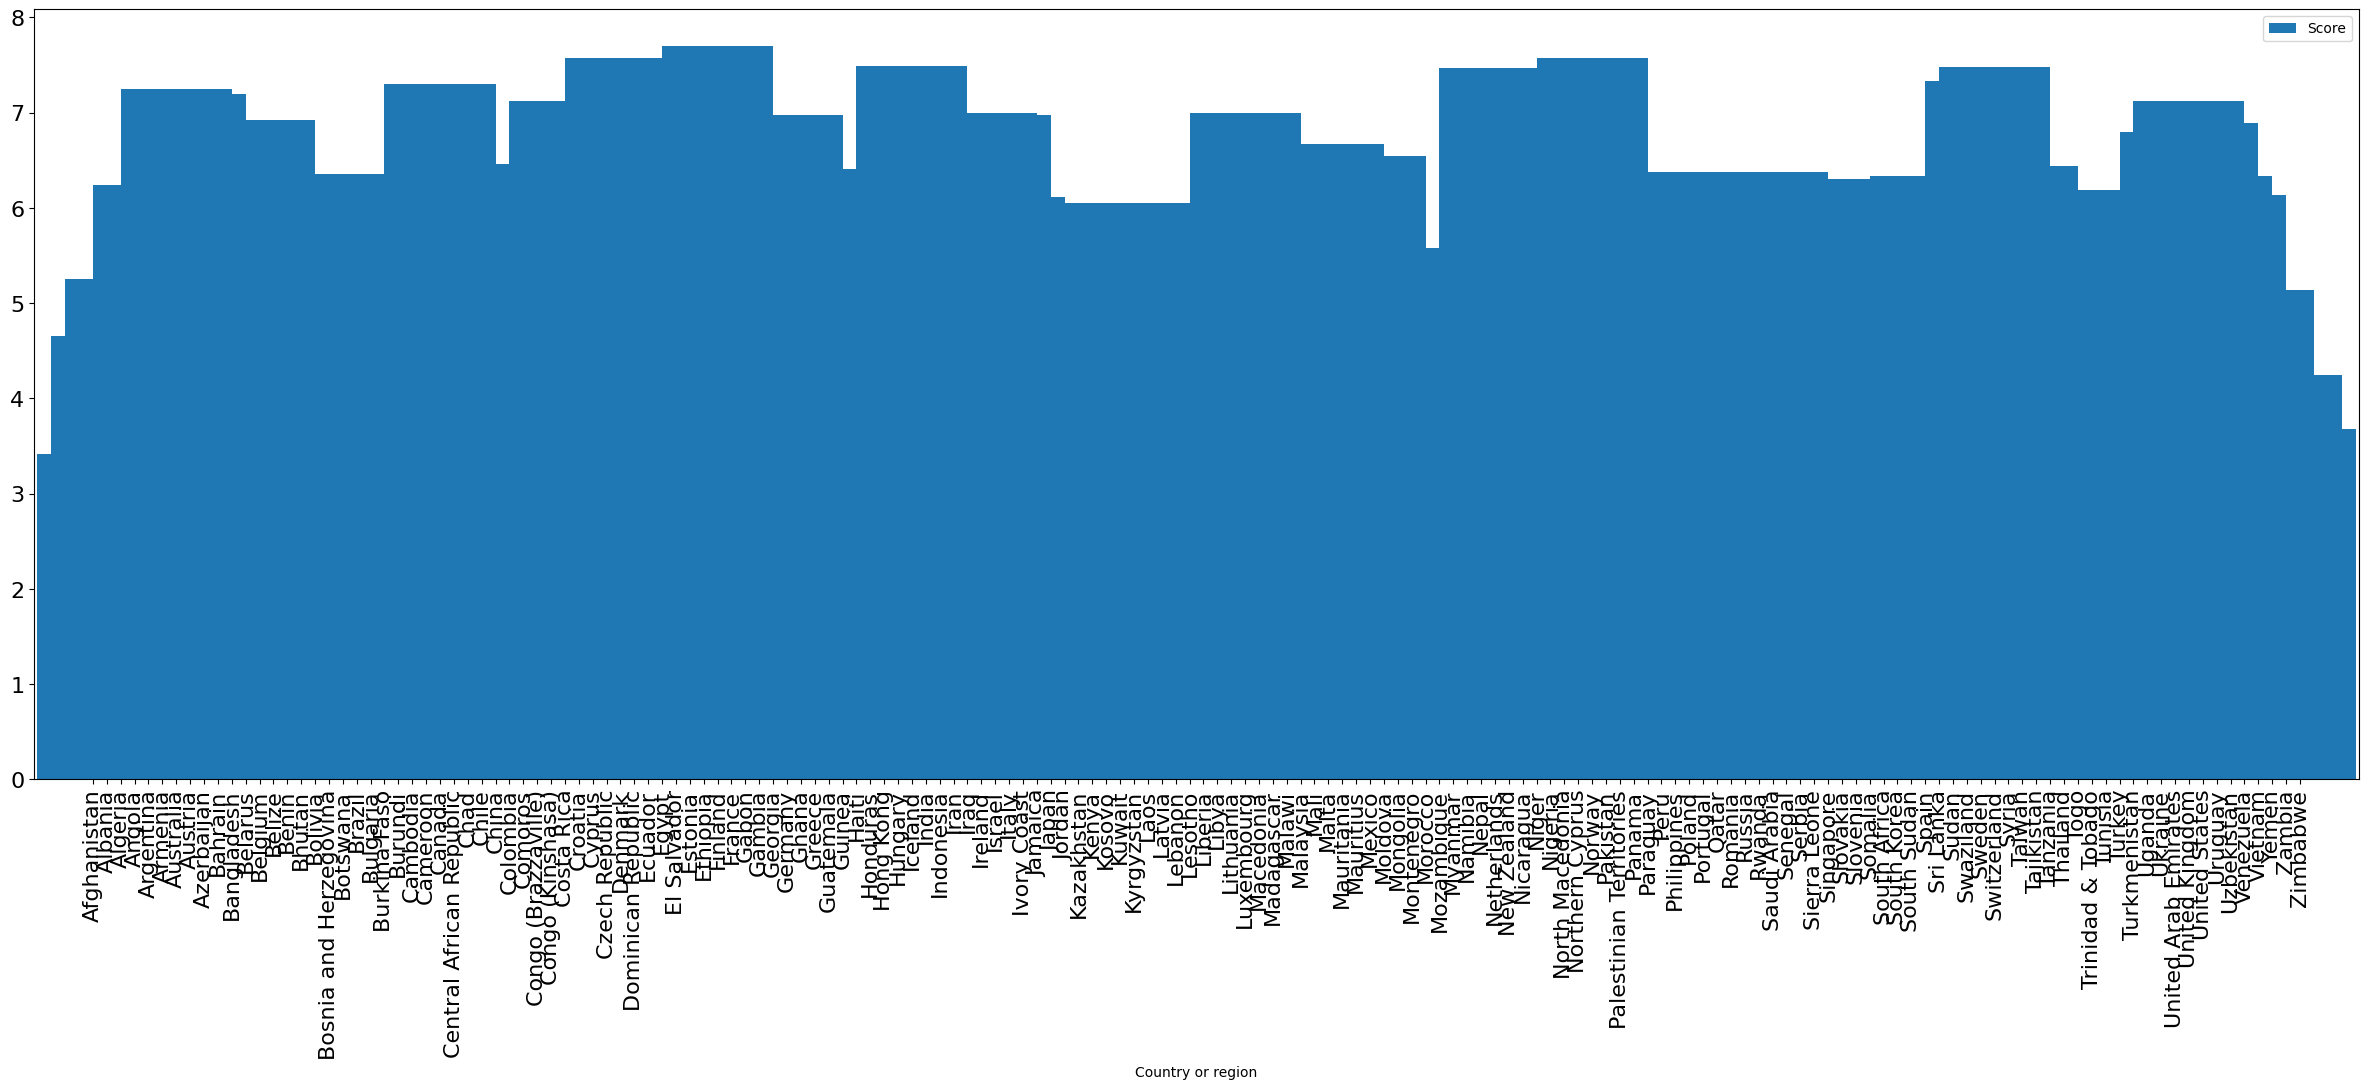

In [98]:
my_chart = my_pivot_all.plot.bar(figsize = (30, 10), fontsize = 16, width=8)

In [99]:
my_data_filtered=my_data.query("Year == 2018")

print(my_data)

     Overall rank Country or region  Year  Score  GDP per capita  \
0             154       Afghanistan  2019  3.203           0.350   
1             145       Afghanistan  2018  3.632           0.332   
2             107           Albania  2019  4.719           0.947   
3             112           Albania  2018  4.586           0.916   
4              88           Algeria  2019  5.211           1.002   
..            ...               ...   ...    ...             ...   
307           152             Yemen  2018  3.355           0.442   
308           138            Zambia  2019  4.107           0.578   
309           125            Zambia  2018  4.377           0.562   
310           146          Zimbabwe  2019  3.663           0.366   
311           144          Zimbabwe  2018  3.692           0.357   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             0.517                    0.361                         0.000   
1             0.537        

In [138]:
list_of_years = [2018, 2019]
my_data_filtered = my_data.query("Year in @list_of_years")

my_data_filtered

,Overall rank,Country or region,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,154,Afghanistan,2019,3.203,0.350,0.517,0.361,0.000,0.158,0.025
1,145,Afghanistan,2018,3.632,0.332,0.537,0.255,0.085,0.191,0.036
2,107,Albania,2019,4.719,0.947,0.848,0.874,0.383,0.178,0.027
3,112,Albania,2018,4.586,0.916,0.817,0.790,0.419,0.149,0.032
4,88,Algeria,2019,5.211,1.002,1.160,0.785,0.086,0.073,0.114
...,...,...,...,...,...,...,...,...,...,...
307,152,Yemen,2018,3.355,0.442,1.073,0.343,0.244,0.083,0.064
308,138,Zambia,2019,4.107,0.578,1.058,0.426,0.431,0.247,0.087
309,125,Zambia,2018,4.377,0.562,1.047,0.295,0.503,0.221,0.082
310,146,Zimbabwe,2019,3.663,0.366,1.114,0.433,0.361,0.151,0.089


In [143]:
my_pivot = pd.pivot_table(my_data_filtered, values='Score', 
                                index='Country or region',
                                columns='Year')
my_pivot = my_pivot.sort_values(by=[], ascending=False)

my_pivot

Year,2018,2019
Country or region,,
Afghanistan,3.632,3.203
Albania,4.586,4.719
Algeria,5.295,5.211
Angola,3.795,NaN
Argentina,6.388,6.086
...,...,...
Venezuela,4.806,4.707
Vietnam,5.103,5.175
Yemen,3.355,3.380


Text(0, 0.5, 'Score')

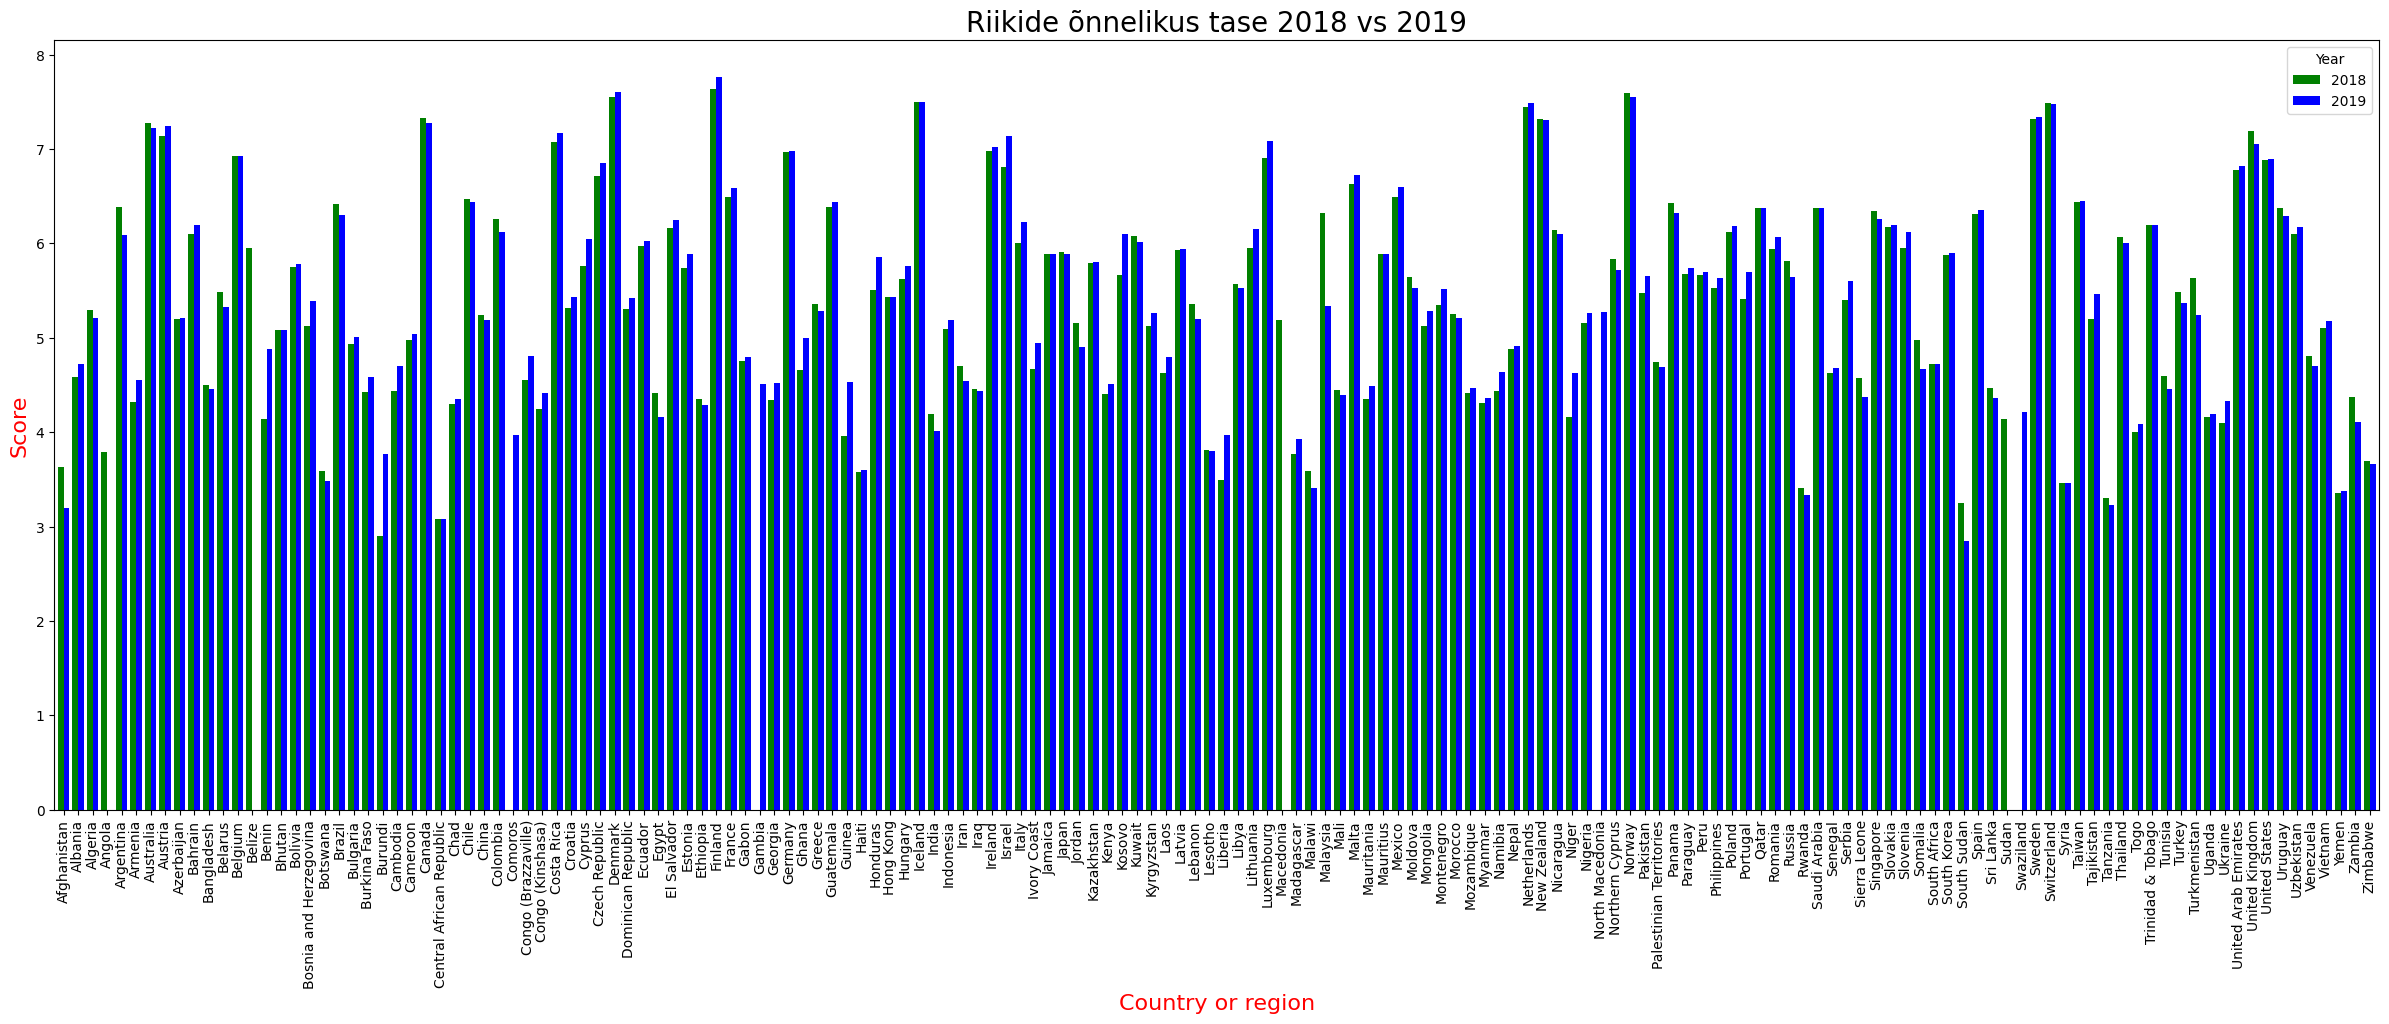

In [142]:
my_chart = my_pivot.plot(kind = 'bar', color=['green','blue'], figsize = (30, 10), fontsize = 10, width=0.8)
plt.xticks(rotation = 90, horizontalalignment = "center")
plt.title("Riikide õnnelikus tase 2018 vs 2019", fontsize = 20)
plt.xlabel("Country or region", fontsize = 16, color = 'red')
plt.ylabel("Score", fontsize = 16, color = 'red')

In [153]:
import pandas as pd

def get_country_info(country_name, dataset):
    # Filter the dataset based on the country name
    country_info = dataset[dataset['Country or region'] == country_name]
    
    # Return the filtered information
    return country_info

# Read the dataset from a CSV file
dataset = pd.read_csv('/kaggle/input/happiness-index-2018-2019/report_2018-2019.csv')  # Replace 'countries.csv' with your actual CSV filename

# Prompt the user to enter a country name
country_name = input("Enter a country name: ")

# Get the information for the entered country
country_info = get_country_info(country_name, dataset)

country_info_finland = get_country_info('Finland', dataset)

# Print the country information if it exists
if not country_info.empty:
    print(country_info)
    print(country_info_finland)
else:
    print("No information found for the entered country.")

Enter a country name:  Poland


     Overall rank Country or region  Year  Score  GDP per capita  \
224            40            Poland  2019  6.182           1.206   
225            42            Poland  2018  6.123           1.176   

     Social support  Healthy life expectancy  Freedom to make life choices  \
224           1.438                    0.884                         0.483   
225           1.448                    0.781                         0.546   

     Generosity  Perceptions of corruption  
224       0.117                      0.050  
225       0.108                      0.064  
    Overall rank Country or region  Year  Score  GDP per capita  \
87             1           Finland  2019  7.769           1.340   
88             1           Finland  2018  7.632           1.305   

    Social support  Healthy life expectancy  Freedom to make life choices  \
87           1.587                    0.986                         0.596   
88           1.592                    0.874                         0

In [154]:
print("Aitäh kuulamast!")

Aitäh kuulamast!
